Most Dangerous Countries for Women in 2024

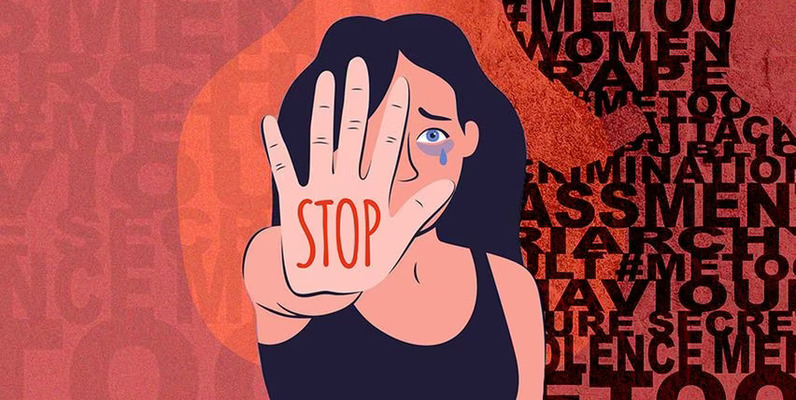



About Dataset

This dataset provides a ranking of countries based on their safety for female travelers. It combines data from the Women, Peace and Security Index (WPSI) 2023 and the Women's Danger Index (WDI) 2019. The WPSI measures women's safety and security globally, while the WDI focuses on specific factors such as street safety, intentional homicide, and violence against women.

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\Data Science Stuff\Datasets\Project 8\most-dangerous-countries-for-women-2024.csv')
print(df.head())
print(df.tail())

         country  \
0          India   
1          China   
2  United States   
3      Indonesia   
4       Pakistan   

   MostDangerousCountriesForWomen_WomenPeaceAndSecurityIndex_Score_2023  \
0                                              0.595                      
1                                              0.700                      
2                                              0.823                      
3                                              0.700                      
4                                              0.481                      

   MostDangerousCountriesForWomen_WomensDangerIndexWDI_TotalScore_2019  \
0                                             541.25                     
1                                             444.55                     
2                                             456.31                     
3                                             442.10                     
4                                                NaN      

In [3]:
df.columns

Index(['country',
       'MostDangerousCountriesForWomen_WomenPeaceAndSecurityIndex_Score_2023',
       'MostDangerousCountriesForWomen_WomensDangerIndexWDI_TotalScore_2019',
       'MostDangerousCountriesForWomen_WDIStreetSafety_2019',
       'MostDangerousCountriesForWomen_WDIIntentionalHomicide_2019',
       'MostDangerousCountriesForWomen_WDINonPartnerViolence_2019',
       'MostDangerousCountriesForWomen_WDIIntimatePartnerViolence_2019',
       'MostDangerousCountriesForWomen_WDILegalDiscrimination_2019',
       'MostDangerousCountriesForWomen_WDIGlobalGenderGap_2019',
       'MostDangerousCountriesForWomen_WDIGenderInequality_2019',
       'MostDangerousCountriesForWomen_WDIAttitudesTowardViolence_2019'],
      dtype='object')

Change name of columns as it is too big here

In [4]:
df.columns = [
    'Country', 'WPSI_2023', 'WDI_Total_2019', 'WDI_Street_Safety_2019', 
    'WDI_Intentional_Homicide_2019', 'WDI_NonPartner_Violence_2019',
    'WDI_IntimatePartner_Violence_2019', 'WDI_Legal_Discrimination_2019', 
    'WDI_Global_Gender_Gap_2019', 'WDI_Gender_Inequality_2019', 
    'WDI_AttitudesTowardViolence_2019'
]

In [5]:
df.columns

Index(['Country', 'WPSI_2023', 'WDI_Total_2019', 'WDI_Street_Safety_2019',
       'WDI_Intentional_Homicide_2019', 'WDI_NonPartner_Violence_2019',
       'WDI_IntimatePartner_Violence_2019', 'WDI_Legal_Discrimination_2019',
       'WDI_Global_Gender_Gap_2019', 'WDI_Gender_Inequality_2019',
       'WDI_AttitudesTowardViolence_2019'],
      dtype='object')

In [6]:
df.head()

,Country,WPSI_2023,WDI_Total_2019,WDI_Street_Safety_2019,WDI_Intentional_Homicide_2019,WDI_NonPartner_Violence_2019,WDI_IntimatePartner_Violence_2019,WDI_Legal_Discrimination_2019,WDI_Global_Gender_Gap_2019,WDI_Gender_Inequality_2019,WDI_AttitudesTowardViolence_2019
0,India,0.595,541.25,41.0,30.0,19.0,83.0,44.0,79.0,100.0,74.0
1,China,0.700,444.55,23.0,6.0,70.0,86.0,44.0,78.0,29.0,80.0
2,United States,0.823,456.31,51.0,25.0,75.0,81.0,24.0,68.0,36.0,21.0
3,Indonesia,0.700,442.10,37.0,3.0,30.0,66.0,54.0,74.0,86.0,51.0
4,Pakistan,0.481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(df.isnull().sum())

Country                                0
WPSI_2023                              0
WDI_Total_2019                       126
WDI_Street_Safety_2019               126
WDI_Intentional_Homicide_2019        126
WDI_NonPartner_Violence_2019         126
WDI_IntimatePartner_Violence_2019    126
WDI_Legal_Discrimination_2019        126
WDI_Global_Gender_Gap_2019           126
WDI_Gender_Inequality_2019           126
WDI_AttitudesTowardViolence_2019     126
dtype: int64


In [8]:
df_cleaned = df.dropna()

In [9]:
print(df_cleaned.isnull().sum())

Country                              0
WPSI_2023                            0
WDI_Total_2019                       0
WDI_Street_Safety_2019               0
WDI_Intentional_Homicide_2019        0
WDI_NonPartner_Violence_2019         0
WDI_IntimatePartner_Violence_2019    0
WDI_Legal_Discrimination_2019        0
WDI_Global_Gender_Gap_2019           0
WDI_Gender_Inequality_2019           0
WDI_AttitudesTowardViolence_2019     0
dtype: int64


In [10]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [11]:
print(df[numeric_cols].describe())

        WPSI_2023  WDI_Total_2019  WDI_Street_Safety_2019  \
count  176.000000      176.000000              176.000000   
mean     0.680330      413.011600               53.740000   
std      0.148371       64.670446               11.409675   
min      0.286000      212.040000                9.000000   
25%      0.581500      413.011600               53.740000   
50%      0.691500      413.011600               53.740000   
75%      0.796500      413.011600               53.740000   
max      0.932000      771.820000              100.000000   

       WDI_Intentional_Homicide_2019  WDI_NonPartner_Violence_2019  \
count                     176.000000                    176.000000   
mean                       15.560000                     39.740000   
std                         9.745422                     12.851597   
min                         3.000000                      6.000000   
25%                        15.560000                     39.740000   
50%                        15.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation matrix

In [13]:
corr_matrix = df[numeric_cols].corr()

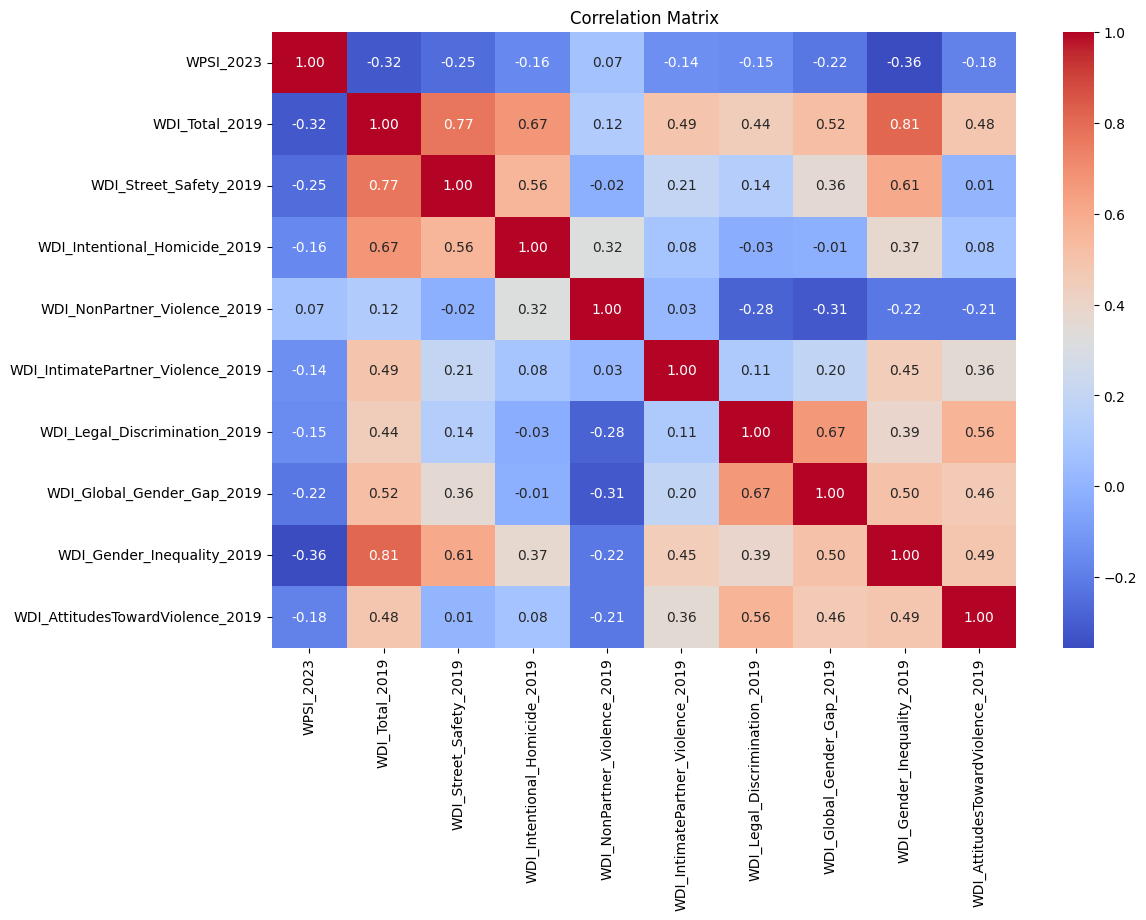

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [15]:
top_dangerous = df.sort_values(by='WDI_Total_2019', ascending=False).head(10)

In [16]:
print('Top 10 most dangerous countries for women based on WDI total score', top_dangerous[['Country', 'WDI_Total_2019']])

Top 10 most dangerous countries for women based on WDI total score                Country  WDI_Total_2019
23        South Africa          771.82
6               Brazil          624.28
8               Russia          592.71
10              Mexico          576.05
16                Iran          553.11
83  Dominican Republic          551.32
12               Egypt          546.91
39             Morocco          542.75
0                India          541.25
19            Thailand          533.22


In [17]:
bottom_dangerous = df.sort_values(by='WDI_Total_2019', ascending=True).head(10)

In [18]:
print('Top 10 Safest countries for women based on WDI total score', bottom_dangerous[['Country', 'WDI_Total_2019']])

Top 10 Safest countries for women based on WDI total score          Country  WDI_Total_2019
31         Spain          212.04
112    Singapore          245.26
121      Ireland          247.31
96       Austria          251.63
98   Switzerland          252.78
116       Norway          259.92
90      Portugal          277.58
127      Croatia          286.53
37        Canada          290.83
38        Poland          291.23


Barplots for safest and dangerous countries for women

C:\Users\Dell\AppData\Local\Temp\ipykernel_7632\1871378679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WDI_Total_2019', y='Country', data=top_dangerous, palette='Reds_r')


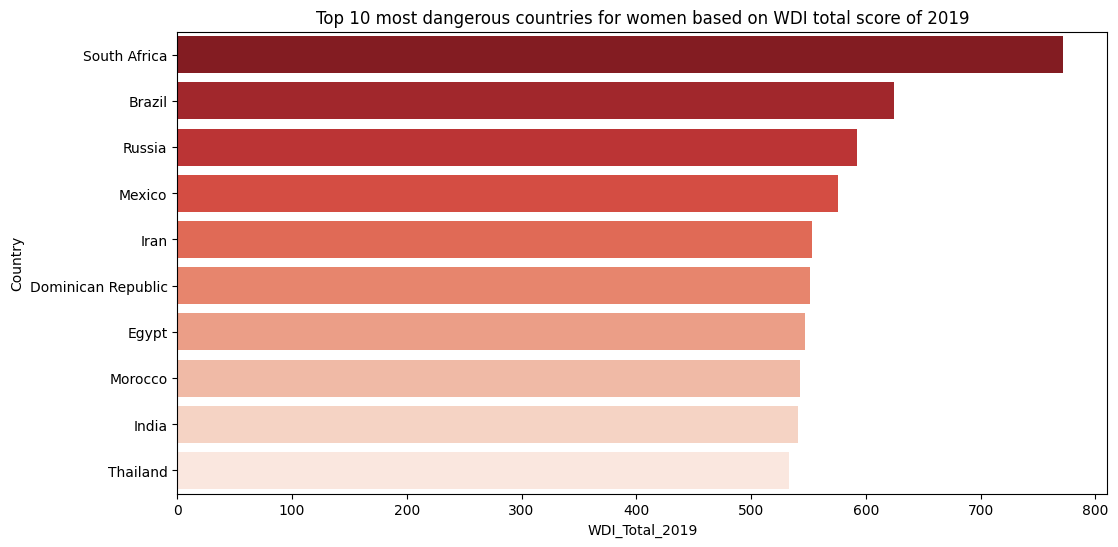

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x='WDI_Total_2019', y='Country', data=top_dangerous, palette='Reds_r')
plt.title('Top 10 most dangerous countries for women based on WDI total score of 2019')
plt.xlabel('WDI_Total_2019')
plt.ylabel('Country')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7632\2827646003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WDI_Total_2019', y='Country', data=bottom_dangerous, palette='Greens')


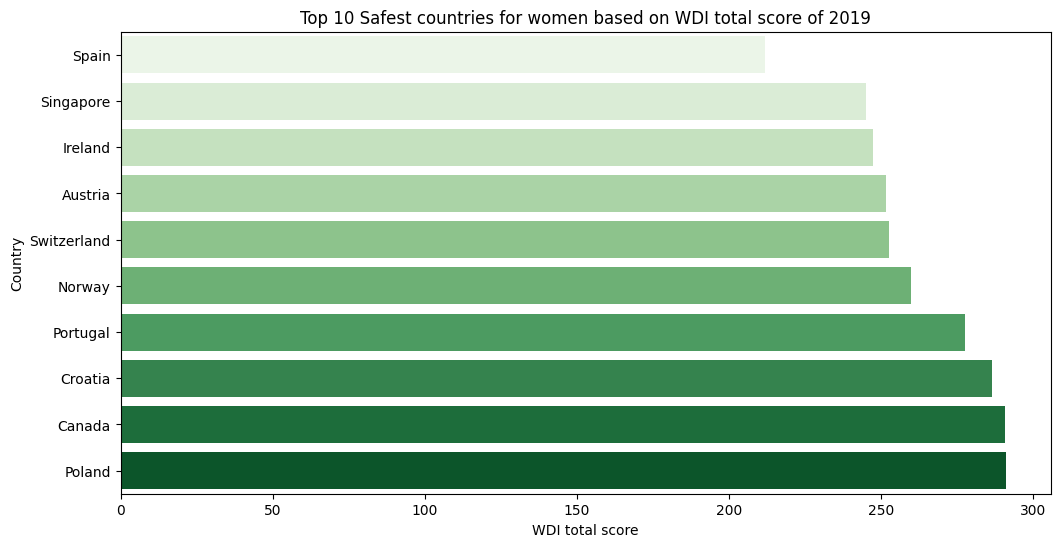

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='WDI_Total_2019', y='Country', data=bottom_dangerous, palette='Greens')
plt.title('Top 10 Safest countries for women based on WDI total score of 2019')
plt.xlabel('WDI total score')
plt.ylabel('Country')
plt.show()

In [21]:
df.columns

Index(['Country', 'WPSI_2023', 'WDI_Total_2019', 'WDI_Street_Safety_2019',
       'WDI_Intentional_Homicide_2019', 'WDI_NonPartner_Violence_2019',
       'WDI_IntimatePartner_Violence_2019', 'WDI_Legal_Discrimination_2019',
       'WDI_Global_Gender_Gap_2019', 'WDI_Gender_Inequality_2019',
       'WDI_AttitudesTowardViolence_2019'],
      dtype='object')

In [22]:
# Assuming the 'Region' column exists (you can manually add a 'Region' column if not)
# First, create a composite score based on existing columns
# Create a composite score by averaging some of the danger-related columns
df['Composite_Danger_Score'] = df[[
    'WDI_Total_2019',
    'WDI_Street_Safety_2019',
    'WDI_Intentional_Homicide_2019',
    'WDI_NonPartner_Violence_2019',
    'WDI_IntimatePartner_Violence_2019',
    'WDI_Legal_Discrimination_2019',
    'WDI_Global_Gender_Gap_2019',
    'WDI_Gender_Inequality_2019',
    'WDI_AttitudesTowardViolence_2019'
]].mean(axis=1)

# Now, assume you have a 'Region' column. If you don't, you'll need to create one.
# Here is an example where we add regions manually (for simplicity)
# You can use a more complex method or an external data source for accurate region assignment
# Add a 'Region' column manually 

regions = {
    'India': 'Asia', 'China': 'Asia', 'United States': 'North America', 'Indonesia': 'Asia', 
    'Pakistan': 'Asia', 'Nigeria': 'Africa', 'Brazil': 'South America', 'Bangladesh': 'Asia',
    'Russia': 'Europe', 'Ethiopia': 'Africa',  # etc. (ensure this matches your data)
}

df['Region'] = df['Country'].map(regions)

if 'Region' in df.columns:
    regional_analysis = df.groupby('Region')['Composite_Danger_Score'].mean().sort_values(ascending=False)
    print("Average Composite Danger Score by Region:\n", regional_analysis)
    


Average Composite Danger Score by Region:
 Region
South America    122.697778
Europe           115.412222
Asia              93.983182
North America     93.034444
Africa            84.130178
Name: Composite_Danger_Score, dtype: float64


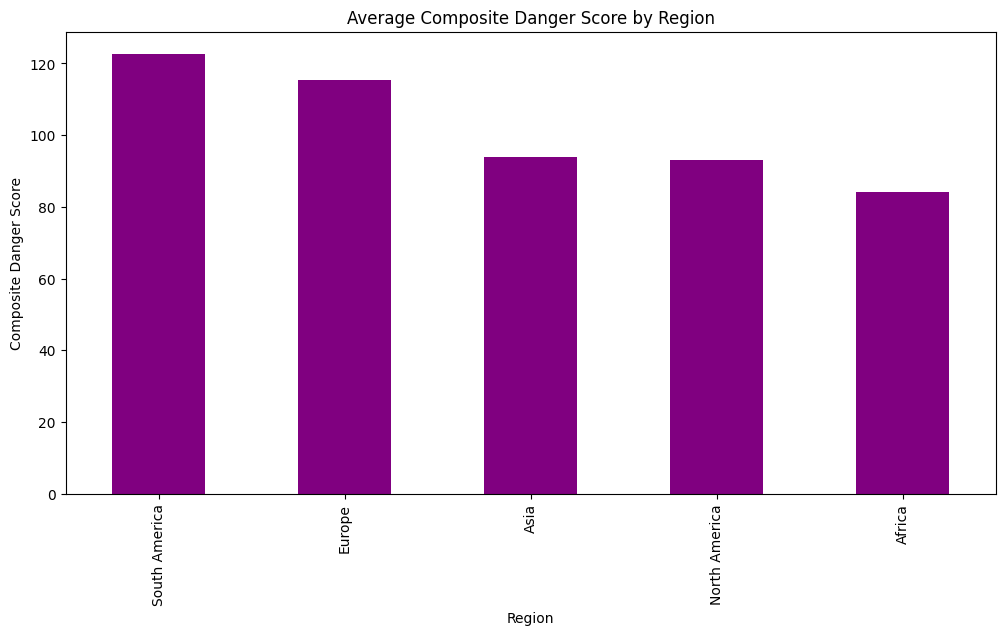

In [23]:
plt.figure(figsize=(12, 6))
regional_analysis.plot(kind='bar', color='purple')
plt.title("Average Composite Danger Score by Region")
plt.xlabel("Region")
plt.ylabel("Composite Danger Score")
plt.show()

In [24]:
top_composite = df.sort_values(by='Composite_Danger_Score', ascending=False).head(10)
bottom_composite = df.sort_values(by='Composite_Danger_Score', ascending=True).head(10)

# Scatter plot to visualize the relationship between gender inequality and safety

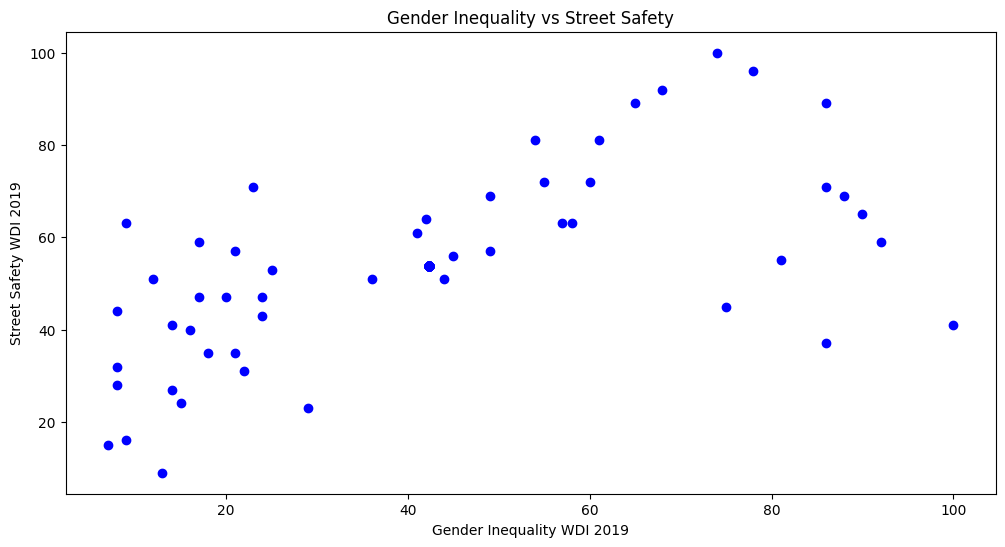

In [25]:
plt.figure(figsize=(12,6))
plt.scatter(df['WDI_Gender_Inequality_2019'] , df['WDI_Street_Safety_2019'], color='blue')
plt.title('Gender Inequality vs Street Safety')
plt.xlabel('Gender Inequality WDI 2019')
plt.ylabel('Street Safety WDI 2019')
plt.show()

In [26]:
top_homicide = df.sort_values(by='WDI_Intentional_Homicide_2019', ascending=False).head(10)
print("Top 10 countries with the highest intentional homicide rate:\n", top_homicide[['Country', 'WDI_Intentional_Homicide_2019']])

Top 10 countries with the highest intentional homicide rate:
                Country  WDI_Intentional_Homicide_2019
23        South Africa                          100.0
8               Russia                           77.0
10              Mexico                           49.0
6               Brazil                           49.0
83  Dominican Republic                           35.0
0                India                           30.0
41             Ukraine                           27.0
2        United States                           25.0
13         Philippines                           25.0
34           Argentina                           19.0


In [27]:
bottom_homicide = df.sort_values(by='WDI_Intentional_Homicide_2019', ascending=True).head(10)
print("Top 10 countries with the lowest intentional homicide rate:\n", bottom_homicide[['Country', 'WDI_Intentional_Homicide_2019']])

Top 10 countries with the lowest intentional homicide rate:
          Country  WDI_Intentional_Homicide_2019
3      Indonesia                            3.0
11         Japan                            3.0
38        Poland                            4.0
69   Netherlands                            4.0
121      Ireland                            4.0
31         Spain                            5.0
24         Italy                            5.0
15       Vietnam                            5.0
92        Greece                            5.0
112    Singapore                            5.0


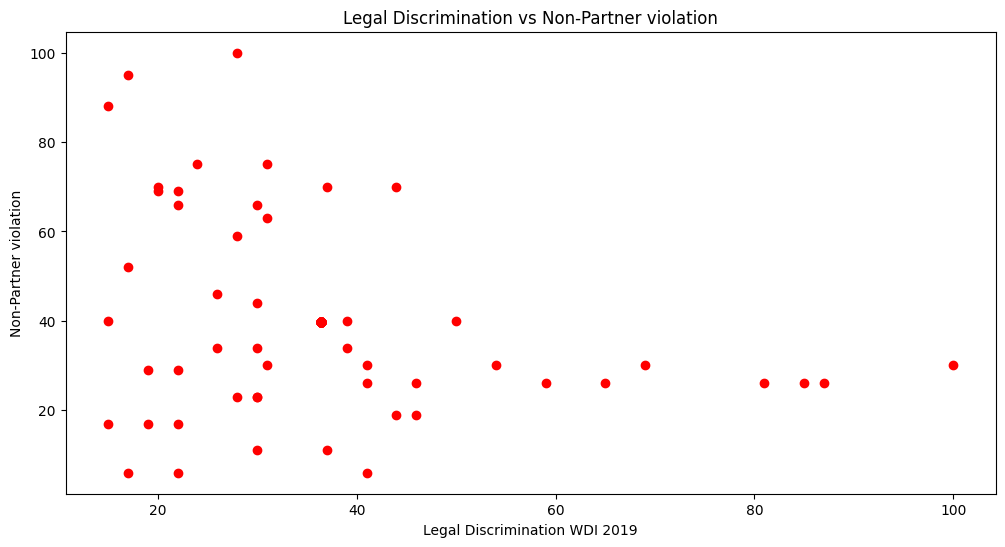

In [28]:
plt.figure(figsize=(12,6))
plt.scatter(df['WDI_Legal_Discrimination_2019'], df['WDI_NonPartner_Violence_2019'], color='red')
plt.title('Legal Discrimination vs Non-Partner violation')
plt.xlabel('Legal Discrimination WDI 2019')
plt.ylabel('Non-Partner violation')
plt.show()

# Create a safety score by combining various columns (lower values are safer)

In [29]:
df['Safety_Score'] = (df['WDI_Street_Safety_2019'] +
                    df['WDI_Intentional_Homicide_2019'] +
                    df['WDI_NonPartner_Violence_2019'] + 
                    df['WDI_IntimatePartner_Violence_2019']) / 4

df['Safety_Rank'] = df['Safety_Score'].rank(ascending=True)
df_sorted_by_safety = df[['Country', 'Safety_Score', 'Safety_Rank']].sort_values(by='Safety_Rank')

print("Countries ranked by safety:\n", df_sorted_by_safety[['Country', 'Safety_Score', 'Safety_Rank']])

Countries ranked by safety:
                 Country  Safety_Score  Safety_Rank
112           Singapore         11.75          1.0
31                Spain         18.75          2.0
96              Austria         21.75          3.0
38               Poland         24.25          4.0
127             Croatia         24.75          5.0
..                  ...           ...          ...
8                Russia         58.25        172.5
83   Dominican Republic         58.25        172.5
10               Mexico         64.25        174.0
6                Brazil         67.75        175.0
23         South Africa         89.00        176.0

[176 rows x 3 columns]


Region-wise comparison of key indicators (e.g., Homicide rates)

In [30]:
region_comparison = df.groupby('Region')[['WDI_Intentional_Homicide_2019', 'WDI_NonPartner_Violence_2019', 'WDI_IntimatePartner_Violence_2019']].mean()

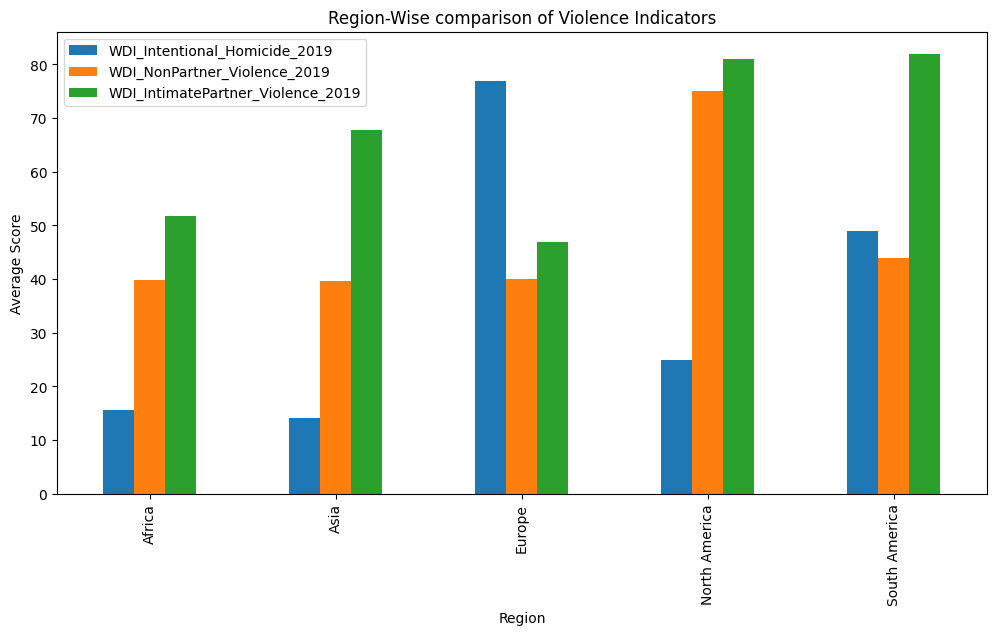

In [31]:
region_comparison.plot(kind='bar', figsize=(12,6))
plt.title('Region-Wise comparison of Violence Indicators')
plt.xlabel('Region')
plt.ylabel('Average Score')
plt.show()

In [32]:
top_dangerous = df.sort_values(by='Composite_Danger_Score', ascending=False).head(10)
bottom_dangerous = df.sort_values(by='Composite_Danger_Score', ascending=True).head(10)

print("Top 10 most dangerous countries:\n", top_dangerous[['Country', 'Composite_Danger_Score']])
print("\nTop 10 safest countries:\n", bottom_dangerous[['Country', 'Composite_Danger_Score']])

Top 10 most dangerous countries:
          Country  Composite_Danger_Score
23  South Africa              149.424444
6         Brazil              122.697778
8         Russia              115.412222
16          Iran              113.901111
39       Morocco              113.305556
12         Egypt              113.101111
10        Mexico              112.561111
0          India              112.361111
19      Thailand              112.024444
47  Saudi Arabia              108.928889

Top 10 safest countries:
          Country  Composite_Danger_Score
31         Spain               43.782222
121      Ireland               50.812222
96       Austria               52.292222
98   Switzerland               53.864444
112    Singapore               54.362222
116       Norway               55.435556
90      Portugal               55.620000
127      Croatia               57.836667
38        Poland               58.247778
37        Canada               59.758889


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

Select the relevant columns for clustering (based on the variables available)

In [34]:
cluster_columns = ['WDI_Street_Safety_2019', 'WDI_Intentional_Homicide_2019', 
                    'WDI_NonPartner_Violence_2019', 'WDI_IntimatePartner_Violence_2019', 
                    'WDI_Legal_Discrimination_2019', 'WDI_Gender_Inequality_2019']

In [35]:
df_cleaned = df[cluster_columns].dropna()

In [36]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_cleaned)

Normalize the data (important for K-means)


In [37]:
df_normalized = pd.DataFrame(normalized_data, columns=cluster_columns)

# Elbow method to find the optimal number of clusters

In [38]:
inertia = []
k_range = range(1, 11)

In [39]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

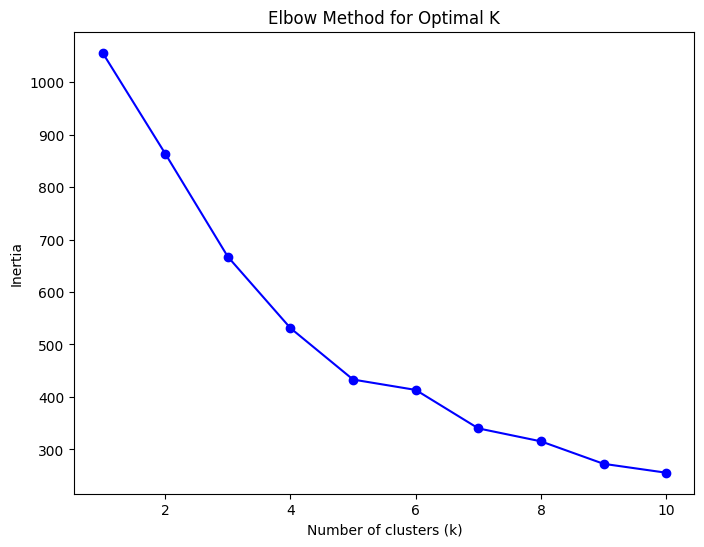

In [40]:
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, marker='o', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster']  = kmeans.fit_predict(df_normalized)
df['Cluster'] = df['Cluster'].astype('category')
print(df[['Country', 'Cluster']].head())

         Country Cluster
0          India       0
1          China       1
2  United States       0
3      Indonesia       0
4       Pakistan       0


# Visualization of clusters using pairplot

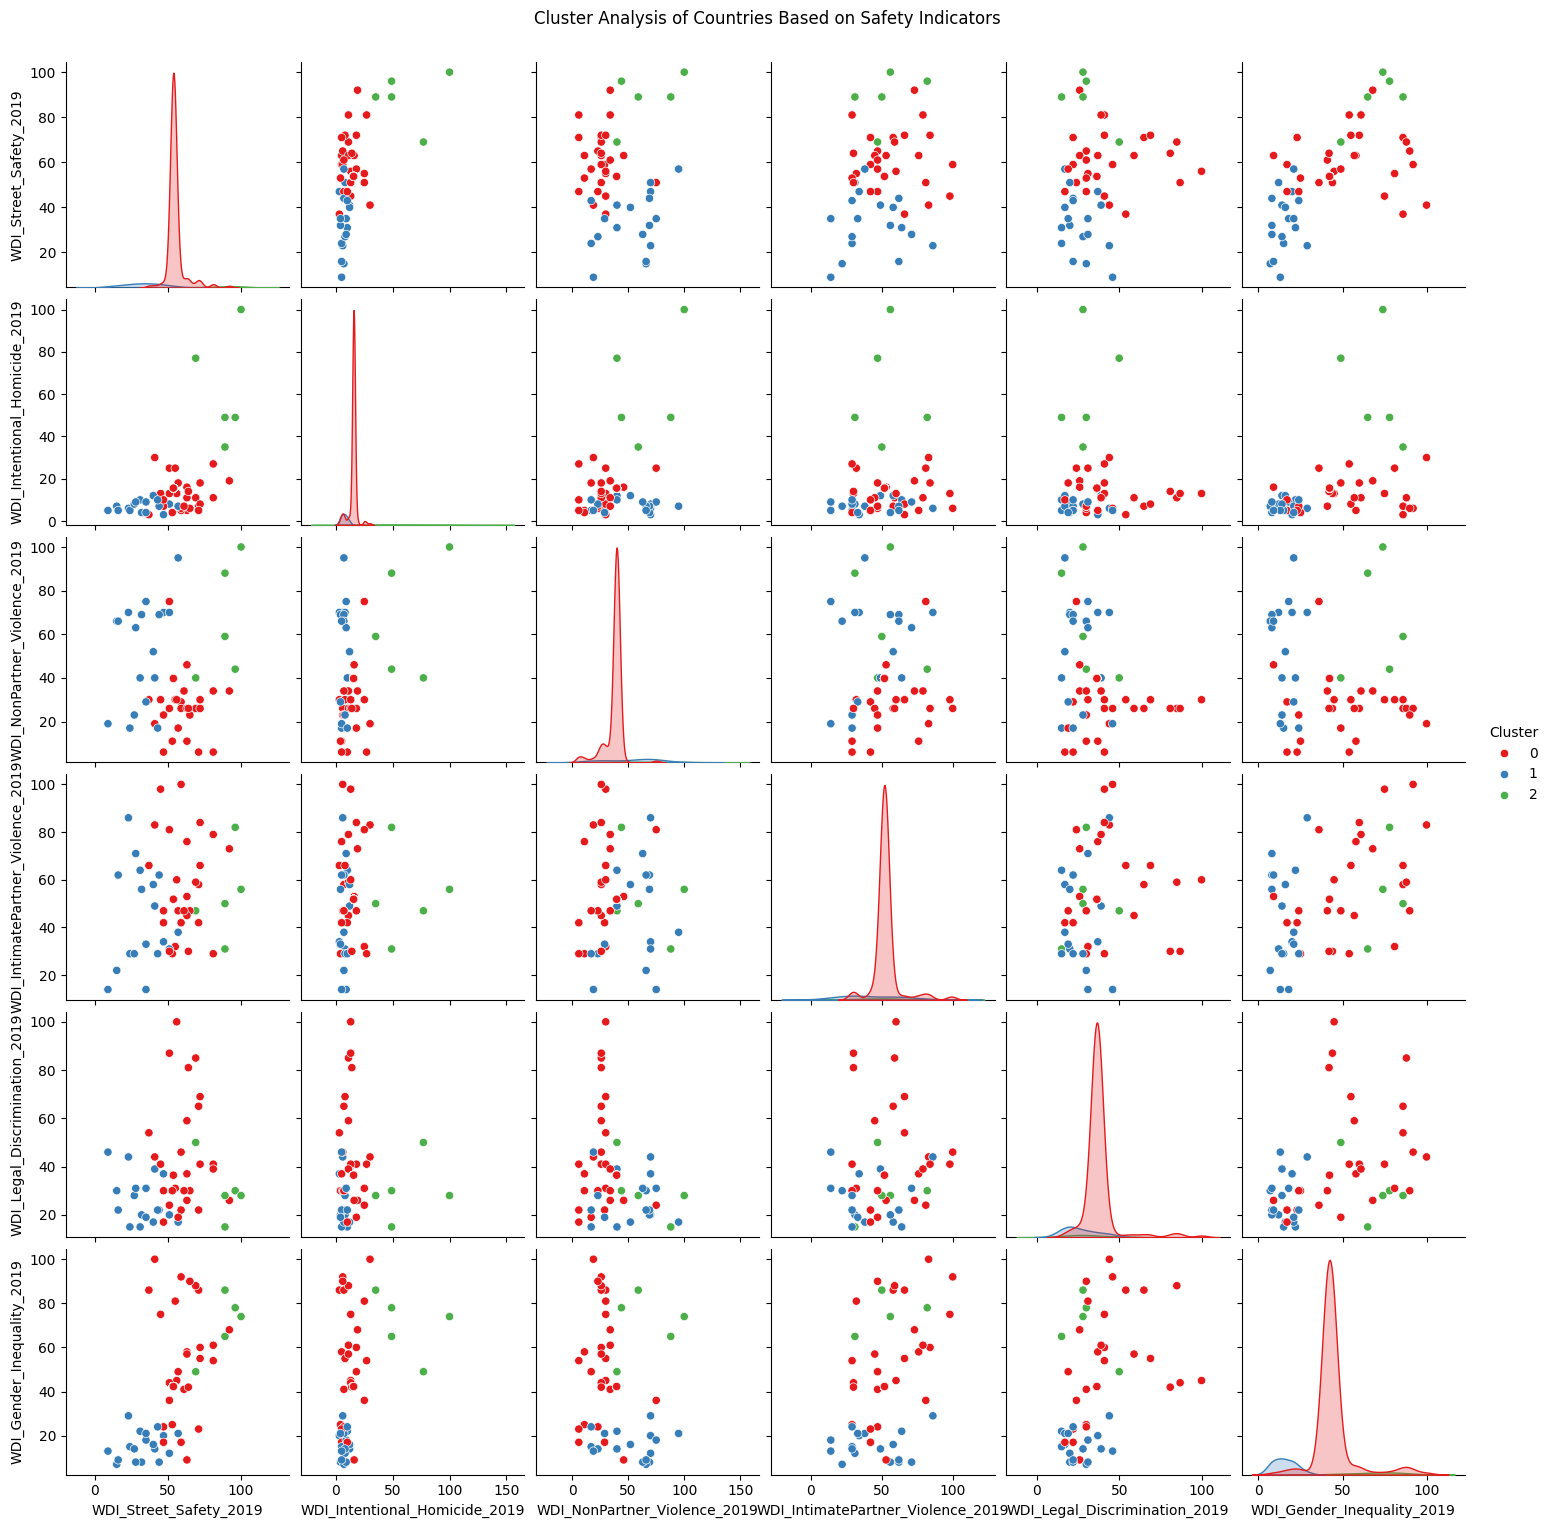

In [44]:
sns.pairplot(df, hue='Cluster', vars=cluster_columns, palette='Set1')
plt.suptitle('Cluster Analysis of Countries Based on Safety Indicators', y=1.02)
plt.show()

In [45]:
from sklearn.decomposition import PCA
#Reduce the data to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_normalized)

# Create a DataFrame with the 2D components and cluster labels
df_pca = pd.DataFrame(principal_components, columns=['PC1','PC2'])
df_pca['Cluster'] = df['Cluster']

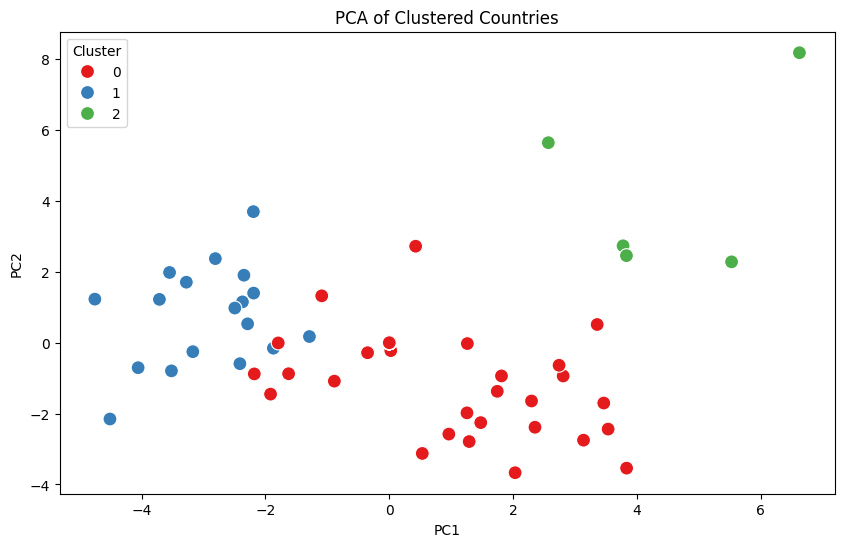

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
plt.title('PCA of Clustered Countries')
plt.show()

# Analyze the cluster centers to understand the characteristics of each cluster

In [47]:
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=cluster_columns)
print("Cluster Centers (means of each cluster)", cluster_centers_df)


Cluster Centers (means of each cluster)    WDI_Street_Safety_2019  WDI_Intentional_Homicide_2019  \
0                0.112034                      -0.055905   
1               -1.803410                      -0.852282   
2                3.064019                       4.778910   

   WDI_NonPartner_Violence_2019  WDI_IntimatePartner_Violence_2019  \
0                     -0.187168                           0.084167   
1                      1.017381                          -0.748898   
2                      2.064762                           0.120517   

   WDI_Legal_Discrimination_2019  WDI_Gender_Inequality_2019  
0                       0.130651                    0.147124  
1                      -0.947190                   -1.765514  
2                      -0.588041                    1.853856  
